# Question 1

In [ ]:
a = 0 

def b():
    global a
    a = c(a)
def c(a):      
    return a + 2      
b()
b()
b()
a

In [ ]:
# Global keyword is being used to convert the local variable a to Global varibale which is inside function b. 
# a=0 and function b is called 3 times before printing a so the o/p is 6 

# Question 2

In [5]:
file_length("C:\\BDAT_Georgian\\Data_Programming_1004\\midterm.py")

#function written in the py file
# def file_length(file_name):
#    try:
#        file = open(file_name)
#        contents = file.read()
#        file.close()
#        print(len(contents))
#    except OSError:
#        print('File is not found')

203


In [2]:
# if file is missing 
file_length("C:\\BDAT_Georgian\\Data_Programming_1004\\idterm.py")

File is not found


# Question 3

In [7]:
class Marsupial:
    def __init__(self):
        self.lst = []
    
    def pouch_contents(self):
        print(self.lst)
        
    def put_in_pouch(self, itm):
        return self.lst.append(itm)
         
class Kangaroo(Marsupial):
    
    def __init__(self, xcd = 0, ycd = 0):
        self.x = xcd
        self.y = ycd
    def setx(self, xcd):
        self.x = xcd
    def sety(self, ycd):
        self.y = ycd
    def get(self):
        return (self.x, self.y)
    def move(self, dx, dy):
        self.x += dx
        self.y += dy
    def __str__(self):
        return 'I am Kangaroo located at ({}, {})'.format(self.x, self.y)
        
        
m = Marsupial()
m.put_in_pouch('doll')
m.put_in_pouch('firetruck')
m.put_in_pouch('kitten')
m.pouch_contents()

k = Kangaroo(0,0)
print(k)


k.move(1,0)
k.move(1,0)
k.move(1,0)
k.get()
print(k)

['doll', 'firetruck', 'kitten']
I am Kangaroo located at (0, 0)
I am Kangaroo located at (3, 0)


# Question 4 

In [12]:
def collatz(num):
    print(num)
    if num == 1:
        return num
    if num % 2 == 0:   
          return  collatz(num // 2)
    return collatz(3 * num + 1)

collatz(int(input("Enter a number:")))

Enter a number:10
10
5
16
8
4
2
1


1

# Question 5

In [14]:
def Binary(n):
    if n > 1:
        Binary(n//2)
    print(n % 2,end = '')

Binary(int(input("Enter a number ")))

Enter a number 10
1010

# Question 6

In [8]:
from html.parser import HTMLParser
from bs4 import BeautifulSoup
infile = open("C:\\BDAT_Georgian\\Data_Programming_1004\\w3c.html")
content = infile.read()
infile.close()
hp = HTMLParser()
hp.feed(content)

# Creating a BeautifulSoup object and specifying the parser
Parse = BeautifulSoup(content, 'lxml')
  
# Printing the name
heading_tags = ["h1", "h2"]
for tags in Parse.find_all(heading_tags):
    print(tags.text.strip(),end='\n ')

W3C Mission
 Principles
 

# Question 7

In [2]:
from html.parser import HTMLParser
from urllib.request import urlopen 

class Collector(HTMLParser):
    
    def __init__(self, url):
        HTMLParser.__init__(self)
        self.url = url
        self.links = []

    
    def handle_starttag(self, tag, attributes):
       
        if tag == 'a':
            for attribute in attributes:
                if attribute[0] == 'href':
                    absolute = urljoin(self.url, attribute[1])
                    if absolute[:4] == 'http': 
                        self.links.append(absolute)
                        
    def getLinks(self):
        return self.links

def webdir(link,depth,ind):
        for indantation in range(ind+1):
            print('\t',end='')
        print(link)
    
        content = urlopen(link).read().decode()
        collector = Collector(link)
        collector.feed(content)
        links = collector.getLinks()

        for k in range(depth):
            try:
                webdir(links[k],depth-1,ind+1)
            except:
                pass


webdir('http://reed.cs.depaul.edu/lperkovic/test1.html',2,0)

	http://reed.cs.depaul.edu/lperkovic/test1.html
		http://reed.cs.depaul.edu/lperkovic/test2.html
			http://reed.cs.depaul.edu/lperkovic/test4.html
		http://reed.cs.depaul.edu/lperkovic/test3.html
			http://reed.cs.depaul.edu/lperkovic/test4.html


# Question 8

In [ ]:
# Created the database and table-City_Temprature in SQl Server and connected to SQL Server.

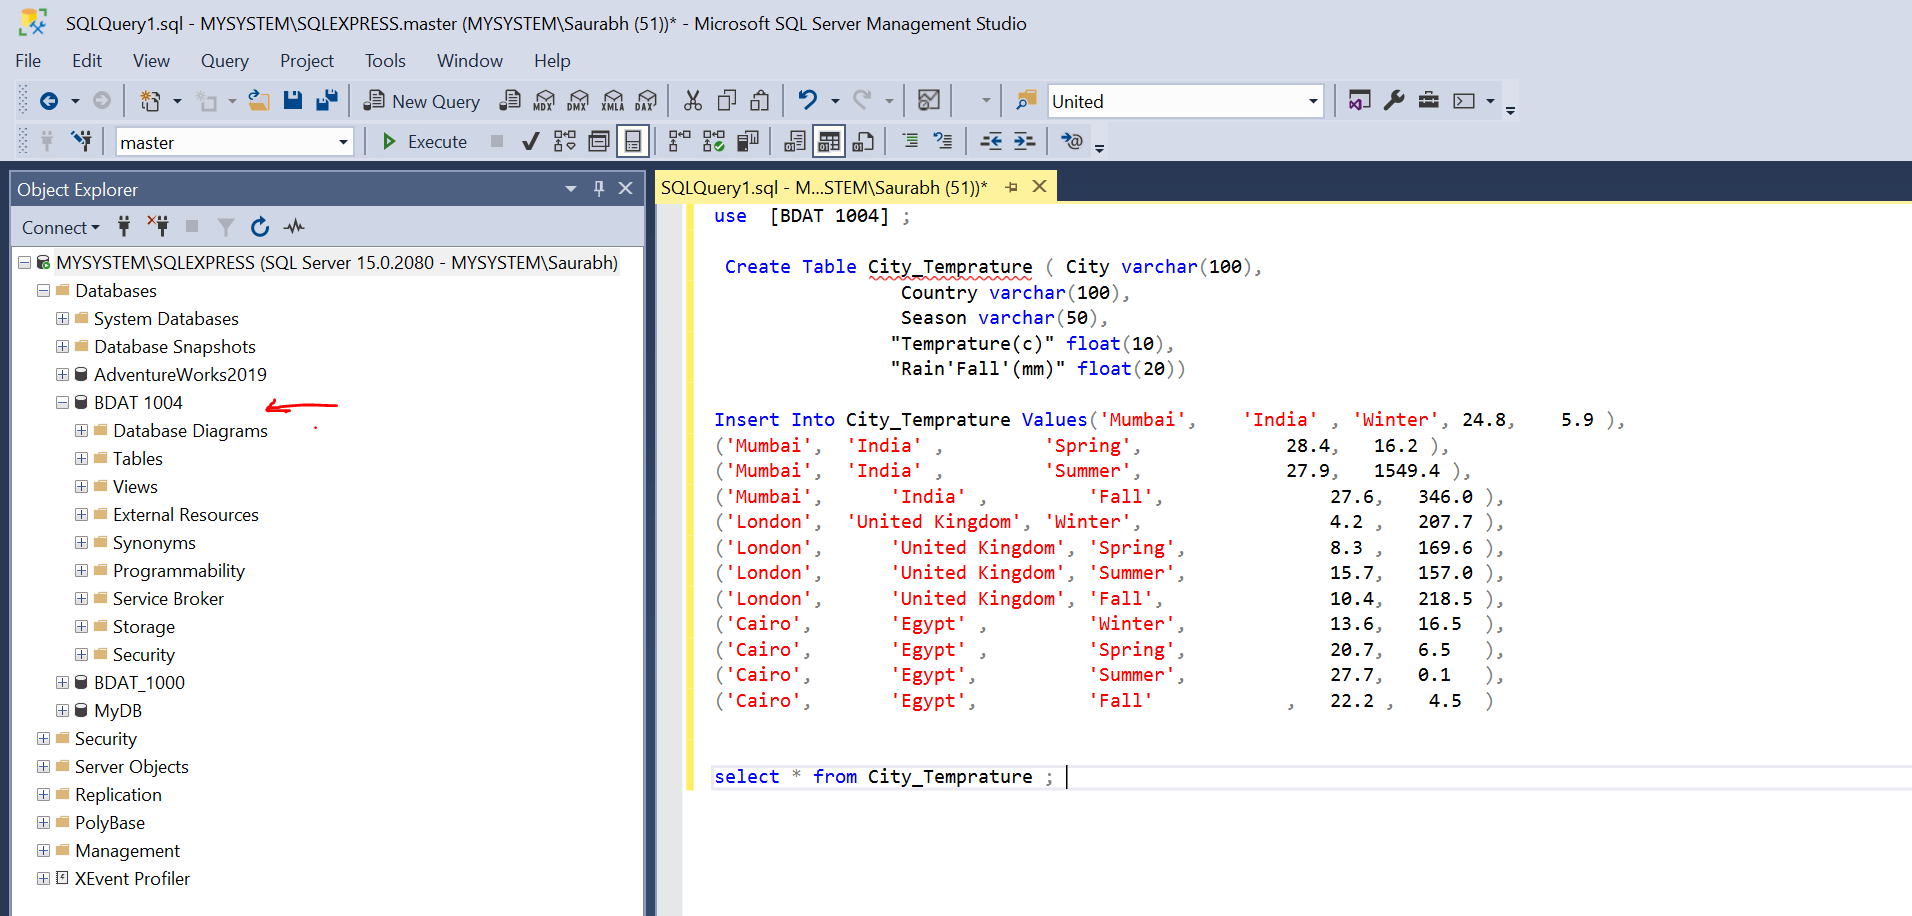

In [4]:
# Reference for the connection string:
# https://docs.microsoft.com/en-us/sql/connect/python/pyodbc/step-3-proof-of-concept-connecting-to-sql-using-pyodbc?view=sql-server-ver15

import pyodbc
server = "MYSYSTEM\SQLEXPRESS"
db = "BDAT 1004"
trusted_connection = "yes"

connection=pyodbc.connect('DRIVER={ODBC Driver 17 for SQL Server};SERVER='+server + ';trusted_connection='+trusted_connection + ';DATABASE=' + db )

cursor = connection.cursor()
cursor.execute("SELECT * FROM City_Temprature")
rows = cursor.fetchall()

#+++++++++++++++++++++++ # 8 A  Print all the Temp.+++++++
print('#8A - Temprature data:')
for row in rows:
    print( round(row[3],2))
print( )

# +++++++++++++ #8 B Print Cities (Unique) ++++++++++++++++++

cursor = connection.cursor()
cursor.execute("Select Distinct City from City_Temprature")
rows_cities = cursor.fetchall()

print('\n #8B - Cities:')
for city in rows_cities:
    print(city[0])
          
# +++++++++ #8 C All records for India ++++++++++++++++
cursor = connection.cursor()
cursor.execute("Select City,Country,Season,round([Temprature(c)],2), round([RainFall(mm)],2) from City_Temprature where Country = 'India'")
rows_India = cursor.fetchall()

print('\n'+" # 8C - All records for India")
for output in rows_India:
        print(output[0:])

#+++++++++ #8 D  All the Fall records ++++++++++++++++++++
cursor = connection.cursor()
cursor.execute("Select City,Country,Season,round([Temprature(c)],2), round([RainFall(mm)],2) from City_Temprature where Season = 'Fall'")
fall_season = cursor.fetchall()
print('\n'+" # 8D - All the Fall records")
for fall_records in fall_season:
        print(fall_records[0:])
        

#+++++++++++8 E - Avg Rainfall between 200 m - 400 m+++++++++++++
cursor = connection.cursor()
cursor.execute("Select City,Country,Season,round(Avg([RainFall(mm)]),2) from City_Temprature group by City, Country,Season having Avg([RainFall(mm)])>= 200 and Avg([RainFall(mm)])<= 400 ")
records = cursor.fetchall()
print('\n'+" # 8E - city, country, and season -Avg. Rainfall b/w 200m - 400 m ")
for record in records:
        print(record[0:])

#++++++++++++8 F - Avg Temp > 20 +++++++++++++++
cursor = connection.cursor()
cursor.execute("Select City,Country,round(Avg([Temprature(c)]),2) from City_Temprature group by City,Country having Avg([Temprature(c)])>20 order by Avg([Temprature(c)])")
temps = cursor.fetchall()

print('\n'+" # 8E - city, country - Avg. Temp is greater than 20 c ")
for temp in temps:
        print(temp[0:])
        
#++++++++++++8 G - Total Annual Rainfall for Cairo +++++++++++++++
cursor = connection.cursor()
cursor.execute("Select City,round(Sum([RainFall(mm)]),2) from City_Temprature where City = 'Cairo' group by City")
Total_Rainfall = cursor.fetchall()

print('\n'+" # 8 G - city - Annual Rainfall for Cairo ")
for Rainfall in Total_Rainfall:
        print(Rainfall[0:])
        
 #++++++++++++8 H - Total Rainfall for each season +++++++++++++++
cursor = connection.cursor()
cursor.execute("Select Season,round(Sum([Temprature(c)]),2) from City_Temprature group by Season")
Total_Temp = cursor.fetchall()

print('\n'+" # 8H - Season - Total Rainfall ")
for Temprature in Total_Temp:
        print(Temprature[0:])
        

#8A - Temprature data:
24.8
28.4
27.9
27.6
4.2
8.3
15.7
10.4
13.6
20.7
27.7
22.2


 #8B - Cities:
Cairo
London
Mumbai

 # 8C - All records for India
('Mumbai', 'India', 'Winter', 24.8, 5.9)
('Mumbai', 'India', 'Spring', 28.4, 16.2)
('Mumbai', 'India', 'Summer', 27.9, 1549.4)
('Mumbai', 'India', 'Fall', 27.6, 346.0)

 # 8D - All the Fall records
('Mumbai', 'India', 'Fall', 27.6, 346.0)
('London', 'United Kingdom', 'Fall', 10.4, 218.5)
('Cairo', 'Egypt', 'Fall', 22.2, 4.5)

 # 8E - city, country, and season -Avg. Rainfall b/w 200m - 400 m 
('London', 'United Kingdom', 'Fall', 218.5)
('London', 'United Kingdom', 'Winter', 207.7)
('Mumbai', 'India', 'Fall', 346.0)

 # 8E - city, country - Avg. Temp is greater than 20 c 
('Cairo', 'Egypt', 21.05)
('Mumbai', 'India', 27.17)

 # 8 G - city - Annual Rainfall for Cairo 
('Cairo', 27.6)

 # 8H - Season - Total Rainfall 
('Fall', 60.2)
('Spring', 57.4)
('Summer', 71.3)
('Winter', 42.6)


# Question 9

In [9]:
words = ['The', 'quick', 'brown', 'fox', 'jumps', 'over',
'the', 'lazy', 'dog']
    
#Question 9 A
word_upper = [each_word.upper() for each_word in (words)] 
print(words) 
print()

#Question 9 B
word_lower = [each_word.lower() for each_word in (words)] 
print(word_upper) 
print()

#Question 9 C
word_len = [len(words) for words in (words)] 
print(word_len)
print()

#Question 9 D
Word_List1 = []
for i in range(len(words)):
    Word_List1.append([word_upper[i],word_lower[i],word_len[i]])
    
print(Word_List1)
print()


#Question 9 E  
Word_Lists = []
for i in range(len(words)):
    if len(words[i]) >= 4:
        Word_Lists.append(words[i])
print(Word_Lists)



['The', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog']

['THE', 'QUICK', 'BROWN', 'FOX', 'JUMPS', 'OVER', 'THE', 'LAZY', 'DOG']

[3, 5, 5, 3, 5, 4, 3, 4, 3]

[['THE', 'the', 3], ['QUICK', 'quick', 5], ['BROWN', 'brown', 5], ['FOX', 'fox', 3], ['JUMPS', 'jumps', 5], ['OVER', 'over', 4], ['THE', 'the', 3], ['LAZY', 'lazy', 4], ['DOG', 'dog', 3]]

['quick', 'brown', 'jumps', 'over', 'lazy']
